In [2]:
pip install jieba

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 21.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314478 sha256=7ed7e69ff4db52c0496893f7e30744f7baa3d006256183e241b54962a7186c4d
  Stored in directory: /home/weixuan/.cache/pip/wheels/c9/69/31/d56d90b22a1777b0b231e234b00302a55be255930f8bd92dcd
Successfully built jieba
Note: you may need to restart the kernel to use updated packages.


In [8]:
import jieba
from nltk.translate.bleu_score import corpus_bleu

# Fonction pour tokeniser les phrases chinoises
def tokenize_chinese_phrases(phrases):
    return [list(jieba.cut(mot)) for mot in phrases]

# Exemple d'utilisation avec des données de référence et candidates en chinois
raw_references_chinese = '大会一致通过关于人道主义人员安全和加强紧急援助协调的四项决议。'
    # Ajoutez d'autres références chinoises pour chaque phrase testé

raw_candidates_chatgpt3_5_chinese = '大会通过一致通过了四项关于人道主义人员安全和加强紧急援助协调的决议。'
    # Ajoutez d'autres traductions générées par ChatGPT-3.5 en chinois
gpt4 = '大会一致通过了四项关于人道主义人员安全和加强紧急援助协调的决议。'
deepl='大会以协商一致的方式通过了四项关于人道主义人员安全和加强紧急援助协调的决议。'
mymodel='大会通过了关于人道主义工作人员安全和加强紧急援助协调的四项决议。'

# Tokenisez les références et les candidats en chinois
references_chinese =  tokenize_chinese_phrases(raw_references_chinese)
candidates_chatgpt3_5_chinese = tokenize_chinese_phrases(raw_candidates_chatgpt3_5_chinese)
c_gpt4= tokenize_chinese_phrases(gpt4)
c_deepl=tokenize_chinese_phrases(deepl)
c_mymodel=tokenize_chinese_phrases(mymodel)

# Calculez et affichez le score BLEU pour les traducteurs en chinois
score_chatgpt3_5_chinese = corpus_bleu(references_chinese, candidates_chatgpt3_5_chinese)
score_gpt4=corpus_bleu(references_chinese, c_gpt4)
score_deepl=corpus_bleu(references_chinese, c_deepl)
score_mymodel=corpus_bleu(references_chinese, c_mymodel)

print("Score BLEU ChatGPT-3.5 (Chinois) :", score_chatgpt3_5_chinese)
print("Score BLEU ChatGPT-4.0 (Chinois) :", score_gpt4)
print("Score BLEU deepl (Chinois) :", score_deepl)
print("Score BLEU mymodel (Chinois) :", score_mymodel)

AssertionError: The number of hypotheses and their reference(s) should be the same 

In [9]:
from nltk.translate.bleu_score import corpus_bleu
import jieba

# Fonction pour tokeniser une phrase chinoise
def tokenize_chinese_phrase(phrase):
    return list(jieba.cut(phrase, cut_all=False))

# Préparation des données pour une seule phrase source
raw_reference_chinese = '大会一致通过关于人道主义人员安全和加强紧急援助协调的四项决议。'
raw_candidates = [
    '大会通过一致通过了四项关于人道主义人员安全和加强紧急援助协调的决议。',
    '大会一致通过了四项关于人道主义人员安全和加强紧急援助协调的决议。',
    '大会以协商一致的方式通过了四项关于人道主义人员安全和加强紧急援助协调的决议。',
    '大会通过了关于人道主义工作人员安全和加强紧急援助协调的四项决议。'
]

# Tokenisation
reference_tokens = [tokenize_chinese_phrase(raw_reference_chinese)]
candidate_tokens = [tokenize_chinese_phrase(candidate) for candidate in raw_candidates]

# Structurer les données pour corpus_bleu
references = [reference_tokens]  # La liste des références doit être emballée dans une autre liste
candidates = candidate_tokens  # Chaque candidat est déjà une liste de tokens

# Calcul des scores BLEU pour chaque traduction candidate
scores = [corpus_bleu(references, [candidate]) for candidate in candidates]

# Affichage des scores
traducteurs = ['ChatGPT-3.5', 'ChatGPT-4.0', 'DeepL', 'Mon Modèle']
for traducteur, score in zip(traducteurs, scores):
    print(f"Score BLEU {traducteur} (Chinois) :", score)


Score BLEU ChatGPT-3.5 (Chinois) : 0.6052600461945848
Score BLEU ChatGPT-4.0 (Chinois) : 0.678364941096179
Score BLEU DeepL (Chinois) : 0.5184341074271375
Score BLEU Mon Modèle (Chinois) : 0.650891137493945


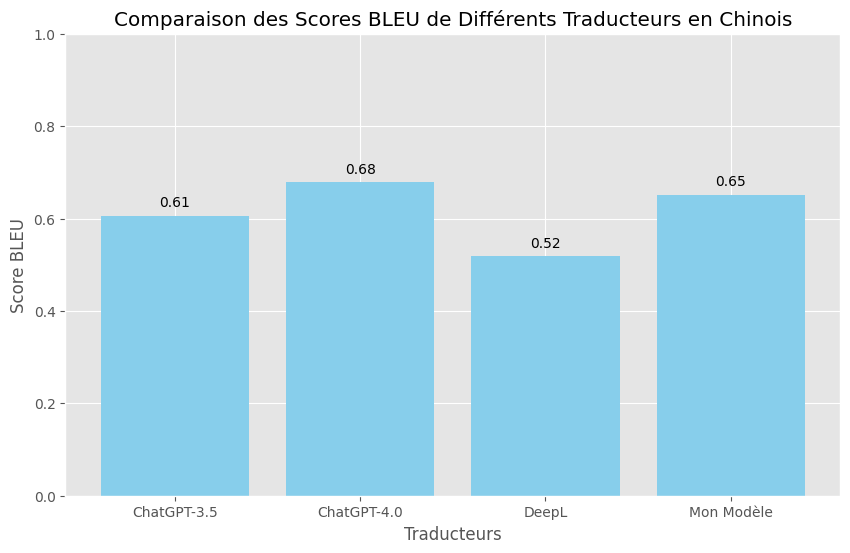

In [12]:
import matplotlib.pyplot as plt

# Les scores BLEU obtenus précédemment
scores_bleu = {
    'ChatGPT-3.5': 0.6052600461945848,
    'ChatGPT-4.0': 0.678364941096179,
    'DeepL': 0.5184341074271375,
    'Mon Modèle': 0.650891137493945,
}

# Noms des traducteurs
traducteurs = list(scores_bleu.keys())

# Scores correspondants
scores = list(scores_bleu.values())

# Configuration du style ggplot
plt.style.use('ggplot')

# Création du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(traducteurs, scores, color='skyblue')

plt.xlabel('Traducteurs')
plt.ylabel('Score BLEU')
plt.title('Comparaison des Scores BLEU de Différents Traducteurs en Chinois')
plt.ylim(0, 1)  # Ajustez selon vos scores BLEU, qui varient entre 0 et 1

# Ajout des valeurs des scores sur les barres
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center')

# Affichage du graphique
plt.savefig('./score_bleu_assemble.png')

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
import jieba

# Fonction pour tokeniser une phrase chinoise
def tokenize_chinese_phrase(phrase):
    return list(jieba.cut(phrase, cut_all=False))

# Préparation des données pour une seule phrase source
raw_reference_chinese = '大会一致通过关于人道主义人员安全和加强紧急援助协调的四项决议。'
raw_candidates = [
    '大会通过一致通过了四项关于人道主义人员安全和加强紧急援助协调的决议。',
    '大会一致通过了四项关于人道主义人员安全和加强紧急援助协调的决议。',
    '大会以协商一致的方式通过了四项关于人道主义人员安全和加强紧急援助协调的决议。',
    '大会通过了关于人道主义工作人员安全和加强紧急援助协调的四项决议。'
]

# Tokenisation
reference_tokens = [tokenize_chinese_phrase(raw_reference_chinese)]
candidate_tokens = [tokenize_chinese_phrase(candidate) for candidate in raw_candidates]

# Structurer les données pour corpus_bleu
references = [reference_tokens]  # La liste des références doit être emballée dans une autre liste
candidates = candidate_tokens  # Chaque candidat est déjà une liste de tokens

# Calcul des scores BLEU pour chaque traduction candidate
scores = [corpus_bleu(references, [candidate]) for candidate in candidates]

# Affichage des scores
traducteurs = ['ChatGPT-3.5', 'ChatGPT-4.0', 'DeepL', 'Mon Modèle']
for traducteur, score in zip(traducteurs, scores):
    print(f"Score BLEU {traducteur} (Chinois) :", score)